# Rotating sinus curves

Tiny example how to rotate a (one-dimensional) sinus curve. Inspired by question of a friend of mine, who wants to have "a perfectly swinging sinus curve between two curves in 2d-plane" for an implementation in a video game.

Author: Tobias Windisch (http://www.tobias-windisch.de)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Task

Create a sinus-curves that swings between two given points in the 2-d plane

In [2]:
# Coordinates start (x1, y1)
x1 = 1
y1 = 2

# Coordinates stop (x2, y2)
x2 = 4
y2 = 10

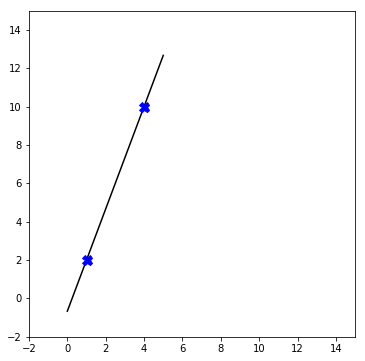

In [34]:
fig, ax = plt.subplots(figsize=(6, 6))
x = np.linspace(0, 5, 20)
ax.plot(x, (y2-y1)/ (x2-x1)*(x-x1) +y1, color='black')
ax.plot(x1, y1, marker='X', color='blue', markersize=10)
ax.plot(x2, y2, marker='X', color='blue', markersize=10)
ax.set_xlim([-2, 15])
ax.set_ylim([-2, 15])
ax.set_aspect(1)

## Not a solution
Just adding a $\sin$ function is not really a nice solution. Eventhough it "swings", it does not symmetrically swing around the straight connection.

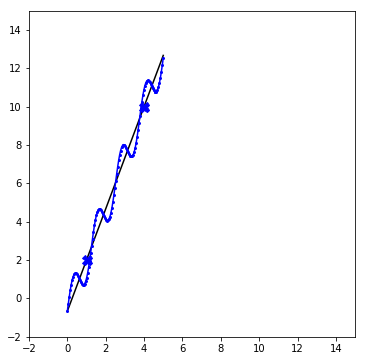

In [37]:
fig, ax = plt.subplots(figsize=(6, 6))

x = np.linspace(0, 5, 100)
ax.plot(x, (y2-y1)/ (x2-x1)*(x-x1) +y1, color='black')
ax.plot(x1, y1, marker='X', color='blue', markersize=10)
ax.plot(x2, y2, marker='X', color='blue', markersize=10)

ax.plot(x, np.sin(5*x) + (y2-y1)/ (x2-x1)*(x-x1) +y1 , marker='o', color='blue', markersize=2)

ax.set_xlim([-2, 15])
ax.set_ylim([-2, 15])
ax.set_aspect(1)

## A solution
Instead, we have to rotate and translate an original sinus-curve using a 2d-[rotation matrix](https://en.wikipedia.org/wiki/Rotation_matrix)

In [38]:
# Number of point to draw
number_of_steps = 200

# Number of sinus waves
number_of_waves = 8

point_start = np.array([x1, y1])
point_stop = np.array([x2, y2])

direction = point_stop - point_start

### Rotation matrices

In [39]:
rotation_angle = -np.arctan((y2-y1) / (x2-x1))

R_forward = np.array([
    [np.cos(rotation_angle), - np.sin(rotation_angle)],
    [np.sin(rotation_angle), np.cos(rotation_angle)],
])

R_backward = np.array([
    [np.cos(-rotation_angle), - np.sin(-rotation_angle)],
    [np.sin(-rotation_angle), np.cos(-rotation_angle)],
])

### Rotate to standard coordinate system

Here, we plot the points on the sinus curve iteratively (using a for loop), which is not optimal from a computational point of view (its not hard to put this into a vectorized form!)

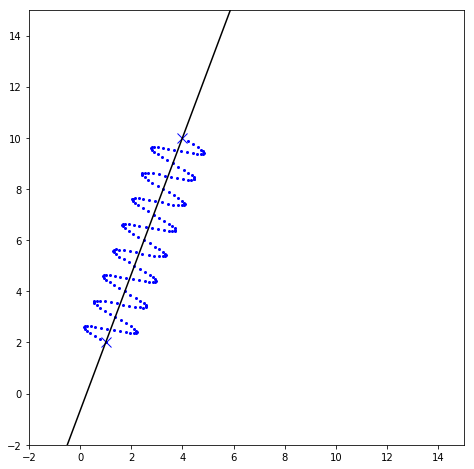

In [40]:
length = np.dot(R_forward, point_stop-point_start)[0]

fig, ax = plt.subplots(figsize=(8, 8))

for t in range(number_of_steps):
    
    # Point along (black) ray
    point = t/number_of_steps * direction
    
    # Rotate point onto x-axis
    point_rotated = np.dot(R_forward, point)
    
    # Apply sinus
    point_waved = np.array([point_rotated[0], np.sin(2*np.pi * number_of_waves / length * point_rotated[0])])
    
    # Rotate sinus back to ray between start and stop
    point_waved_rotated_back = np.dot(R_backward, point_waved)
    
    # Shift sinus between start and stop
    point_waved_rotated_back_shifted = point_waved_rotated_back + point_start
    
    # Draw point
    ax.plot(point_waved_rotated_back_shifted[0], point_waved_rotated_back_shifted[1], marker='o', color='blue', markersize=2)
    
    
# only for drawing
ax.plot(x1, y1, marker='x', color='blue', markersize=10)
ax.plot(x2, y2, marker='x', color='blue', markersize=10)

x = np.linspace(-2, 6, 100)
ax.plot(x, (y2-y1)/ (x2-x1)*(x-x1) +y1, color='black')
ax.set_xlim([-2, 15])
ax.set_ylim([-2, 15])
ax.set_aspect(1)